<b>TMDB Movies Recommendation

The dataset used in this project is sourced from The Movie Database (TMDB) and contains information about the top 10,000 movies. It includes important attributes such as movie ratings, popularity scores, vote counts, language, and release details. Each row represents an individual movie, and each column describes a specific characteristic of that movie. This dataset provides a real-world basis for analyzing movie performance and is well-suited for applying machine learning technique

## Import Libraries

In [830]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
#for evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

#for classification algorithm,s
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack



In [720]:
df=pd.read_csv(r"C:\Users\Pc\Desktop\ML PROJECT\top10K-TMDB-movies.csv")
df

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668


# BASIC UNDERSTANDING

In [721]:
df['title'].nunique()

9661

In [722]:
df.shape

(10000, 9)

In [723]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [724]:
df.tail()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668
9999,455957,Domino,"Thriller,Action,Crime",en,Seeking justice for his partner’s murder by an...,16.482,2019-05-31,4.6,221


In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [726]:
df.sample()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
2238,417678,"Everything, Everything","Drama,Romance",en,A teenager who's lived a sheltered life becaus...,30.059,2017-05-18,7.3,3459


In [727]:
df.duplicated().sum()

0

In [728]:
df.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

# temperory

In [729]:
df['genre'] = df['genre'].fillna('').astype(str)


In [730]:
df['genre_list'] = df['genre'].apply(
    lambda x: x.split(',') if x.strip() != '' else []
)


In [731]:
df['genre_list']

0                                          [Drama, Crime]
1                                [Comedy, Drama, Romance]
2                                          [Drama, Crime]
3                                   [Drama, History, War]
4                                          [Drama, Crime]
                              ...                        
9995                         [Action, Adventure, Fantasy]
9996    [Action, TV Movie, Science Fiction, Comedy, Ad...
9997                       [Action, Science Fiction, War]
9998                  [Adventure, Fantasy, Action, Drama]
9999                            [Thriller, Action, Crime]
Name: genre_list, Length: 10000, dtype: object

In [732]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre_list'])

genre_encoded


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [733]:
genre_df = pd.DataFrame(
    genre_encoded,
    columns=mlb.classes_,
    index=df.index
)

genre_df

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9996,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9998,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [734]:


df = pd.concat([df, genre_df], axis=1)
# 

In [735]:
df.drop(columns=['genre', 'genre_list'], inplace=True)

In [736]:
df

,id,title,original_language,overview,popularity,release_date,vote_average,vote_count,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,278,The Shawshank Redemption,en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19404,Dilwale Dulhania Le Jayenge,hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,0,0,...,0,0,0,0,1,0,0,0,0,0
2,238,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,0,0,...,0,0,0,0,0,0,0,0,0,0
3,424,Schindler's List,en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,0,0,...,1,0,0,0,0,0,0,0,1,0
4,240,The Godfather: Part II,en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347,1,1,...,0,0,0,0,0,0,0,0,0,0
9996,331446,Sharknado 3: Oh Hell No!,en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417,1,1,...,0,0,0,0,0,1,1,0,0,0
9997,13995,Captain America,en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332,1,0,...,0,0,0,0,0,1,0,0,1,0
9998,2312,In the Name of the King: A Dungeon Siege Tale,en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668,1,1,...,0,0,0,0,0,0,0,0,0,0


In [737]:
df.isnull().sum()

id                    0
title                 0
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
Action                0
Adventure             0
Animation             0
Comedy                0
Crime                 0
Drama                 0
Family                0
Fantasy               0
History               0
Horror                0
Music                 0
Mystery               0
Romance               0
Science Fiction       0
TV Movie              0
Thriller              0
War                   0
Western               0
dtype: int64

# EDA(exploratory data analysis)

# feature engineering

In [738]:
from typing import List

def display_cols_value_counts(col_names:list[str]):
    for  col_name in col_names:
        print('-'*30)
        print(f"column: {col_name}")
        print('-'*30)
        print("the datatype:",df[col_name].dtype)
        print("the number of null values:",df[col_name].isnull().sum())
        print(df[col_name].describe())
        print(" ")

        # check if the unique  values in the column are less than 10 to display frequent 
        if df[col_name].nunique()<10:
            print("there are ",df[col_name].nunique(),"unique values")
            print(df[col_name].value_counts())

        else:
            print("(frequency table does not displayd ,there are ",df[col_name].nunique(),"unique values") 
            print('')
display_cols_value_counts(df.columns)            


------------------------------
column: id
------------------------------
the datatype: int64
the number of null values: 0
count     10000.000000
mean     161243.505000
std      211422.046043
min           5.000000
25%       10127.750000
50%       30002.500000
75%      310133.500000
max      934761.000000
Name: id, dtype: float64
 
(frequency table does not displayd ,there are  10000 unique values

------------------------------
column: title
------------------------------
the datatype: object
the number of null values: 0
count                    10000
unique                    9661
top       Beauty and the Beast
freq                         4
Name: title, dtype: object
 
(frequency table does not displayd ,there are  9661 unique values

------------------------------
column: original_language
------------------------------
the datatype: object
the number of null values: 0
count     10000
unique       43
top          en
freq       7810
Name: original_language, dtype: object
 
(frequency

In [739]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['id', 'popularity', 'vote_average', 'vote_count'], dtype='object')

In [740]:
df.columns

Index(['id', 'title', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [741]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year


In [742]:
df.drop(["release_date"],axis=1,inplace=True)

In [743]:
df.head()

,id,title,original_language,overview,popularity,vote_average,vote_count,Action,Adventure,Animation,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_year
0,278,The Shawshank Redemption,en,Framed in the 1940s for the double murder of h...,94.075,8.7,21862,0,0,0,...,0,0,0,0,0,0,0,0,0,1994
1,19404,Dilwale Dulhania Le Jayenge,hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,8.7,3731,0,0,0,...,0,0,0,1,0,0,0,0,0,1995
2,238,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,8.7,16280,0,0,0,...,0,0,0,0,0,0,0,0,0,1972
3,424,Schindler's List,en,The true story of how businessman Oskar Schind...,44.761,8.6,12959,0,0,0,...,0,0,0,0,0,0,0,1,0,1993
4,240,The Godfather: Part II,en,In the continuing saga of the Corleone crime f...,57.749,8.6,9811,0,0,0,...,0,0,0,0,0,0,0,0,0,1974


In [744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   original_language  10000 non-null  object 
 3   overview           9987 non-null   object 
 4   popularity         10000 non-null  float64
 5   vote_average       10000 non-null  float64
 6   vote_count         10000 non-null  int64  
 7   Action             10000 non-null  int32  
 8   Adventure          10000 non-null  int32  
 9   Animation          10000 non-null  int32  
 10  Comedy             10000 non-null  int32  
 11  Crime              10000 non-null  int32  
 12  Drama              10000 non-null  int32  
 13  Family             10000 non-null  int32  
 14  Fantasy            10000 non-null  int32  
 15  History            10000 non-null  int32  
 16  Horror             1000

# visualization

movies with highest rating

In [745]:
df.sort_values(by='vote_average', ascending=False)[
    ['title', 'vote_average', 'vote_count',"popularity"]
].head(10)


,title,vote_average,vote_count,popularity
0,The Shawshank Redemption,8.7,21862,94.075
2,The Godfather,8.7,16280,90.585
1,Dilwale Dulhania Le Jayenge,8.7,3731,25.408
3,Schindler's List,8.6,12959,44.761
4,The Godfather: Part II,8.6,9811,57.749
5,Impossible Things,8.6,255,14.358
16,"The Good, the Bad and the Ugly",8.5,6747,47.730
26,Once Upon a Time in America,8.5,4241,25.789
25,Life Is Beautiful,8.5,11179,55.527
24,Violet Evergarden: The Movie,8.5,251,23.933



 * The Shawshank Redemption, The Godfather, and Dilwale Dulhania Le Jayenge share the highest rating (8.7), indicating strong audience appreciation.

 * Movies like The Shawshank Redemption and The Godfather also have very high vote counts, which makes their ratings more reliable and credible.

 * Some movies such as Impossible Things and Violet Evergarden: The Movie have high ratings but low vote counts, suggesting that their scores may be influenced by a smaller audience.

 * Popularity does not always correlate with rating. For example, Dilwale Dulhania Le Jayenge has a high rating but much lower popularity compared to Hollywood classics.

 * Overall, movies with both high ratings and high vote counts (e.g., The Shawshank Redemption, The Godfather) can be considered the most consistently well-received films.

* High vote average alone is not sufficient; vote count and popularity are important to judge the true impact of a movie.

movies have enough votes

In [746]:
high_rated_movies = df[
    df['vote_count'] >= 1000
].sort_values(by='vote_average', ascending=False)[
    ['title', 'vote_average', 'vote_count','release_year']
].head(10)

high_rated_movies 


,title,vote_average,vote_count,release_year
0,The Shawshank Redemption,8.7,21862,1994
2,The Godfather,8.7,16280,1972
1,Dilwale Dulhania Le Jayenge,8.7,3731,1995
3,Schindler's List,8.6,12959,1993
4,The Godfather: Part II,8.6,9811,1974
16,"The Good, the Bad and the Ugly",8.5,6747,1966
26,Once Upon a Time in America,8.5,4241,1984
25,Life Is Beautiful,8.5,11179,1997
23,GoodFellas,8.5,10294,1990
22,Seven Samurai,8.5,2725,1954


 * Movies at the top have very high average ratings, showing strong audience satisfaction.
However, titles with higher vote counts are more reliable, while high ratings with low votes may reflect limited audience feedback.

In [747]:
top_5_movies = high_rated_movies.head(5).set_index('title')


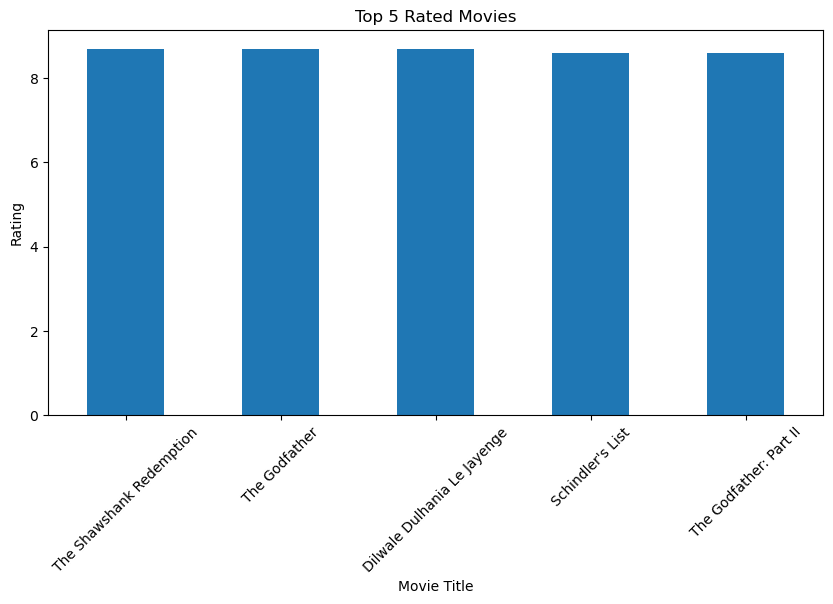

In [748]:
plt.figure(figsize=(10,5))
top_5_movies['vote_average'].plot(kind='bar')
plt.title("Top 5 Rated Movies")
plt.ylabel("Rating")
plt.xlabel("Movie Title")
plt.xticks(rotation=45)
plt.show()


The plot shows the top 5 highest-rated movies based on average user ratings.

The Shawshank Redemption has the highest rating, making it the most critically acclaimed movie among the top five.

The Godfather and The Godfather: Part II also have very high ratings, showing strong audience appreciation for this movie series.

Schindler’s List and Dilwale Dulhania Le Jayenge are similarly highly rated, indicating global as well as regional audience preference.

All five movies have ratings above 8.5, which suggests they are universally well-received and considered classics.

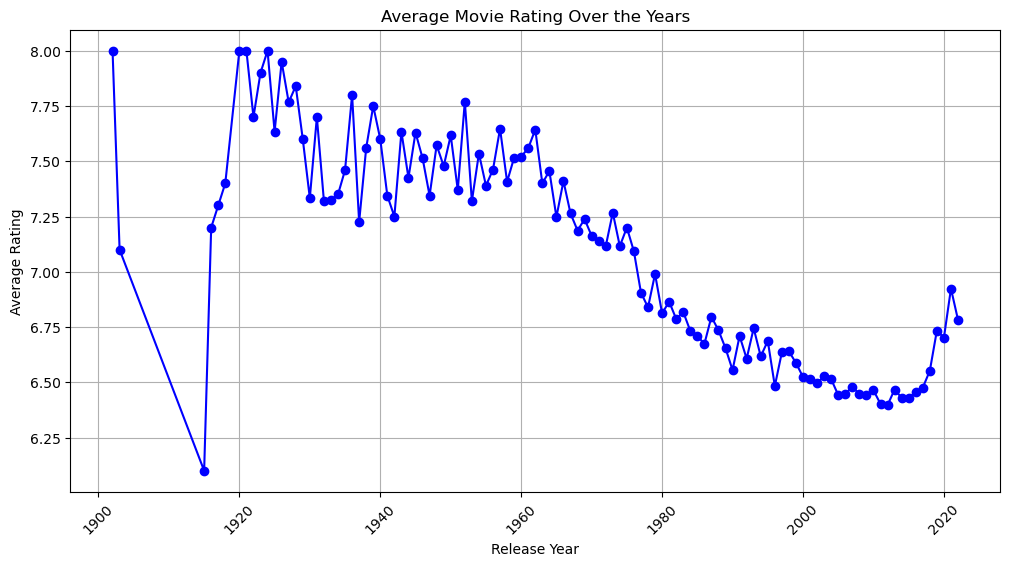

In [749]:
import matplotlib.pyplot as plt

# Group by release year and calculate average rating
year_rating = df.groupby('release_year')['vote_average'].mean()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(year_rating.index, year_rating.values, marker='o', color='blue')
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


 * The plot shows that average movie ratings were highest in the early–mid 20th century, peaking around the 1920s–1950s.
 * After the 1970s, ratings gradually declined, with a slight recovery in recent years, indicating changing audience preferences and industry trends over time.

genere distribution

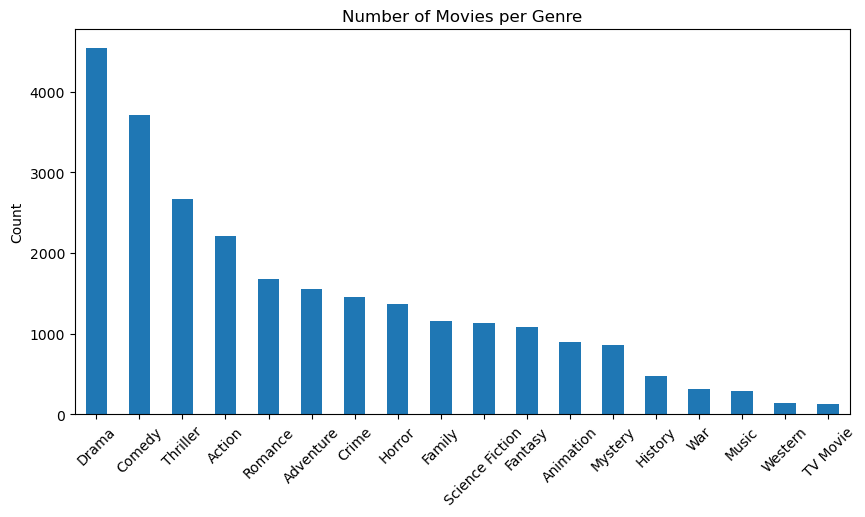

In [750]:
genre_counts = df[mlb.classes_].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar')
plt.title("Number of Movies per Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


 * The plot shows that Drama and Comedy are the most produced genres, indicating their broad audience appeal and popularity in the film industry.
 * In contrast, genres like Western, TV Movie, and Music have the fewest films, suggesting they cater to more niche audiences.

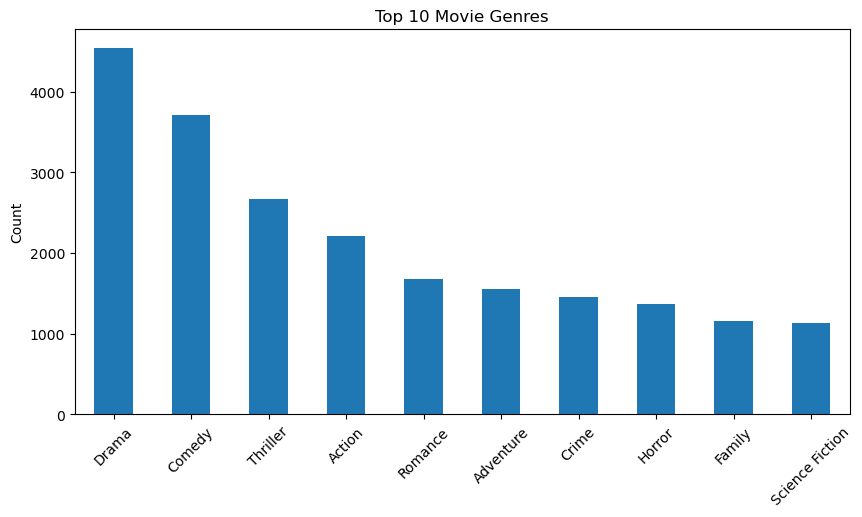

In [751]:
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10,5))
top_10_genres.plot(kind='bar')
plt.title("Top 10 Movie Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


 * The plot indicates that Drama and Comedy dominate the dataset, having the highest number of movies produced.
Genres like Family and Science Fiction have comparatively fewer movies, suggesting lower production frequency or more niche audience demand.

In [752]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'], dtype=object)

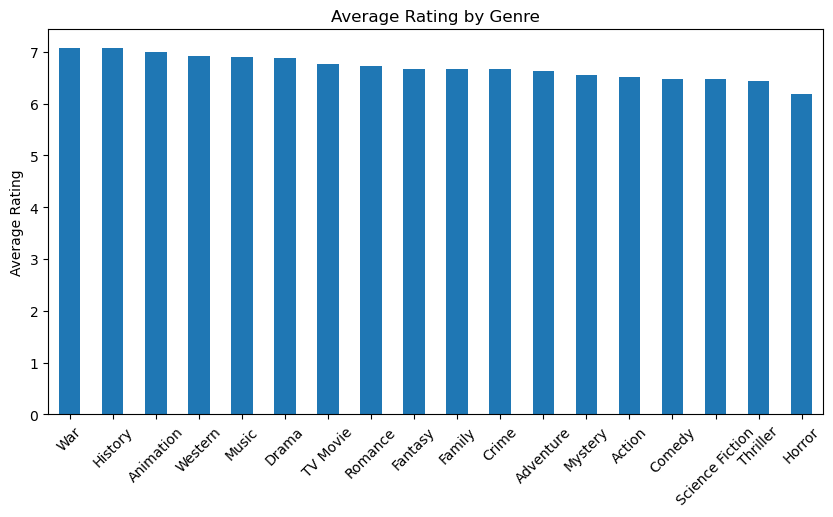

In [753]:
genre_avg_rating = {}

for genre in mlb.classes_:
    genre_avg_rating[genre] = df.loc[df[genre] == 1, 'vote_average'].mean()

genre_avg_rating = pd.Series(genre_avg_rating).sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_avg_rating.plot(kind='bar')
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


 * The plot shows that War and History genres have the highest average ratings, indicating strong critical and audience appreciation.
 * In contrast, Horror and Thriller have comparatively lower average ratings, suggesting more mixed audience responses despite their popularity.

CHI-SQUARE PLOT

In [754]:
def categorize_rating(rating):
    if rating >= 7.5:
        return "High"
    elif rating >= 5.0:
        return "Medium"
    else:
        return "Low"

df["vote_category"] = df["vote_average"].apply(categorize_rating)


In [755]:
genre_cols = [
    "Action","Adventure","Animation","Comedy","Crime","Drama","Family",
    "Fantasy","History","Horror","Music","Mystery","Romance",
    "Science Fiction","TV Movie","Thriller","War","Western"
]


In [756]:
contingency_table = pd.DataFrame()

for genre in genre_cols:
    contingency_table[genre] = df.groupby("vote_category")[genre].sum()

contingency_table


,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
vote_category,,,,,,,,,,,,,,,,,,
High,248,223,249,385,226,993,180,191,119,66,53,116,281,129,20,249,93,34
Low,36,20,3,66,11,22,8,14,0,42,1,15,10,30,2,51,1,3
Medium,1929,1315,644,3263,1216,3527,969,880,356,1258,235,734,1389,980,111,2363,219,107


 * Higher Chi-Square score → stronger relationship with target

 * p-value < 0.05 → statistically significant genre

In [757]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("p-value:", p)


Chi-square value: 772.5453794239082
p-value: 2.147379187828275e-140


 * p < 0.05 → Genre distribution depends on rating category

 * p ≥ 0.05 → Genre and rating are independent

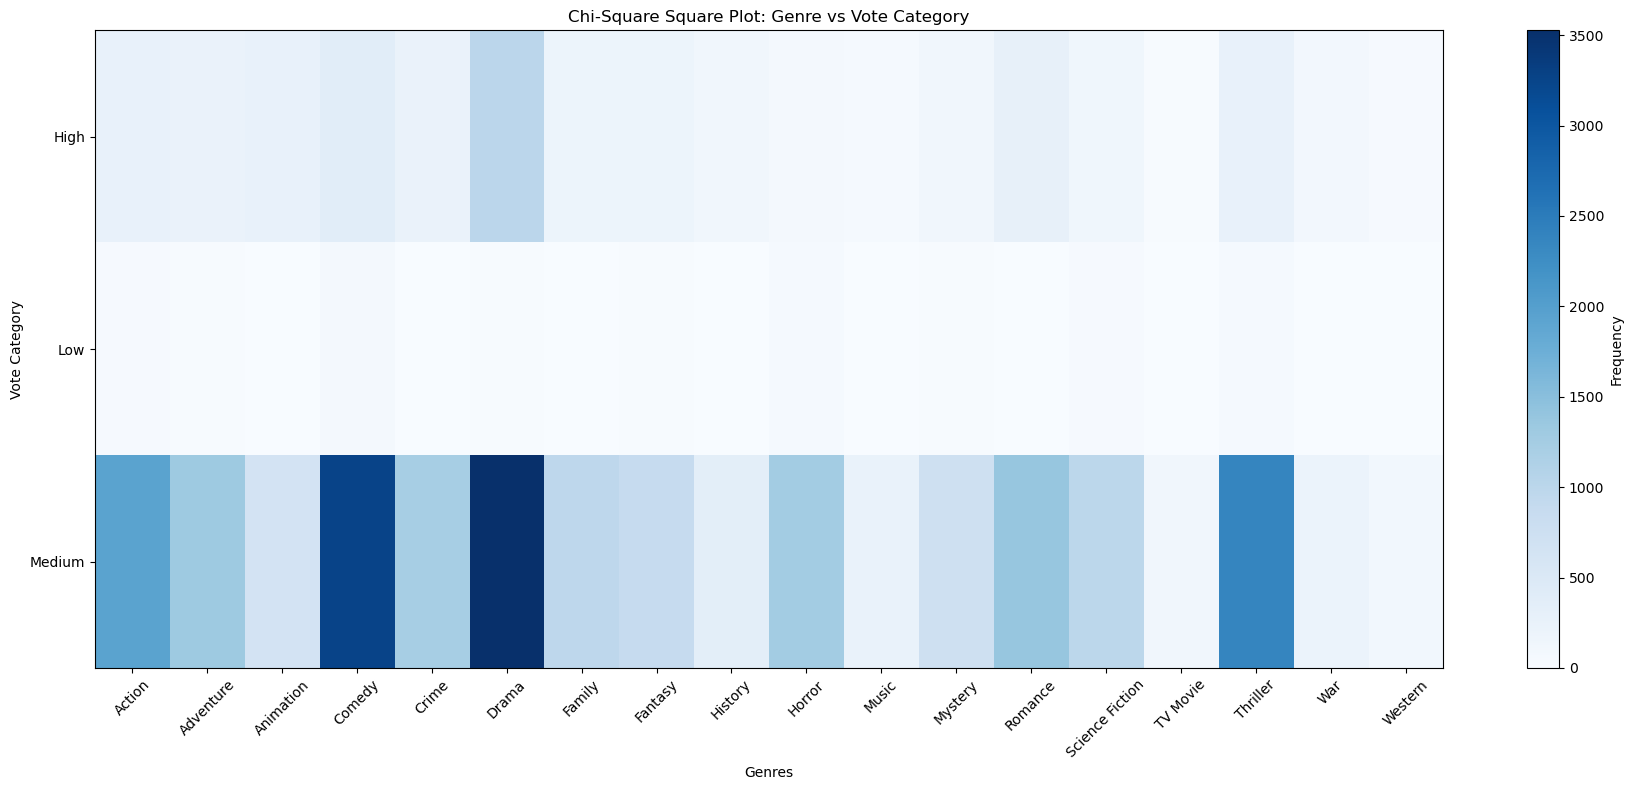

In [758]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,8))
plt.imshow(contingency_table, aspect='auto',cmap="Blues")
plt.colorbar(label='Frequency')

plt.xticks(
    ticks=np.arange(len(contingency_table.columns)),
    labels=contingency_table.columns,
    rotation=45
)
plt.yticks(
    ticks=np.arange(len(contingency_table.index)),
    labels=contingency_table.index
)

plt.xlabel("Genres")
plt.ylabel("Vote Category")
plt.title("Chi-Square Square Plot: Genre vs Vote Category")

plt.tight_layout()
plt.show()


“The chi-square square plot shows that most movies across all genres fall into the medium rating category, with Drama, Comedy, and Thriller having the highest frequencies. High-rated movies are comparatively fewer and are not concentrated in any specific genre, while low-rated movies are minimal across all genres. This suggests that genre alone does not strongly influence movie ratings.”

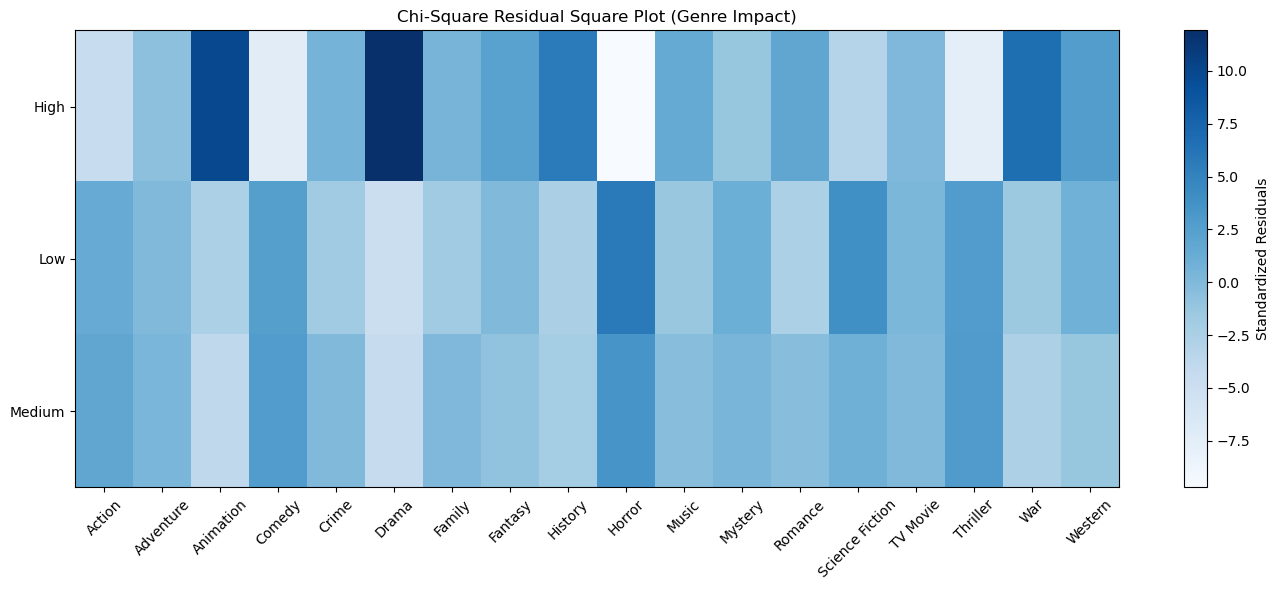

In [759]:
residuals = (contingency_table - expected) / np.sqrt(expected)

plt.figure(figsize=(14,6))
plt.imshow(residuals, aspect='auto',cmap="Blues")
plt.colorbar(label='Standardized Residuals')

plt.xticks(
    np.arange(len(contingency_table.columns)),
    contingency_table.columns,
    rotation=45
)
plt.yticks(
    np.arange(len(contingency_table.index)),
    contingency_table.index
)

plt.title("Chi-Square Residual Square Plot (Genre Impact)")
plt.tight_layout()
plt.show()


The Chi-Square test likely yielded a significant p-value, meaning Genre and Impact are not independent. The plot specifically highlights that Drama, Animation, and War are your "heavy hitters" for high impact, while Horror and Science Fiction are disproportionately represented in the low-impact bracket.

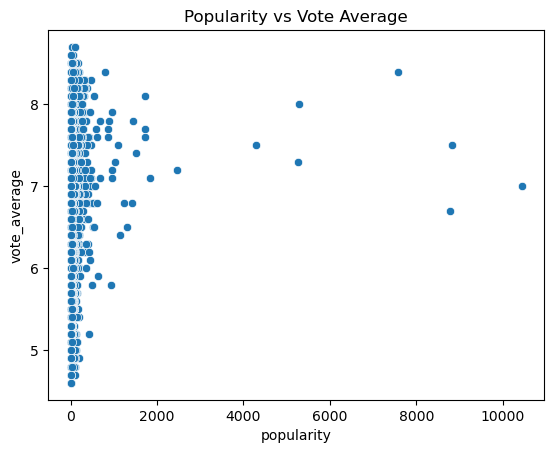

In [760]:
plt.figure()
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title("Popularity vs Vote Average")
plt.show()


The plot suggests that while being popular generally protects a movie from very low ratings, it does not mean the most popular movies are the highest rated. True "critical darlings" (rating > 8.5) are rarely the most popular ones in this dataset.

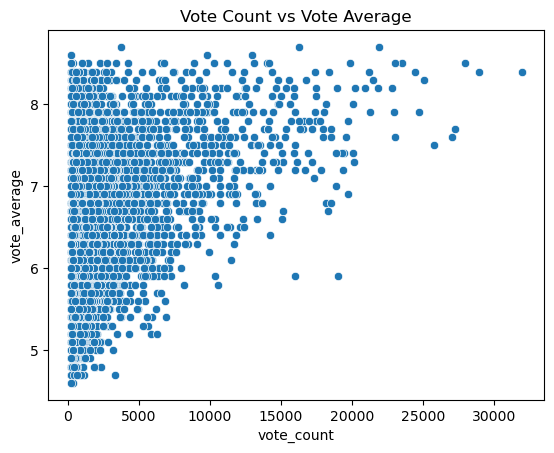

In [761]:
plt.figure()
sns.scatterplot(x='vote_count', y='vote_average', data=df)
plt.title("Vote Count vs Vote Average")
plt.show()


Both plots indicate that high audience engagement (popularity and vote count) serves as a quality floor, where highly recognized movies almost never fall below a 6.0 rating. Conversely, the highest volatility is found among movies with low engagement, which contain both the top-rated "hidden gems" and the lowest-rated flops. Ultimately, as a movie reaches mass-market status, its rating tends to stabilize and converge between 6.5 and 8.5, reflecting a broad audience consensus rather than extreme critical opinions.

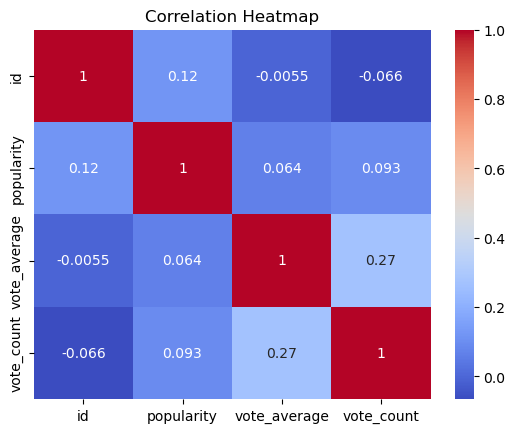

In [762]:
plt.figure()
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap reveals an extremely weak relationship (0.064) between popularity and vote average, indicating that a movie's viral status is not a predictor of its quality. While still weak, the correlation between vote count and vote average (0.27) is the strongest in the set, suggesting that movies with more reviews tend to have slightly more stable, higher ratings. The negligible correlation (0.093) between popularity and vote count implies that high visibility does not always result in a high volume of user scores. Ultimately, these engagement metrics are poor standalone predictors for a film's critical success, as none of the variables show a strong linear dependency.

In [763]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# select numerical columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# IMPORTANT: drop target-related columns
num_cols = num_cols.drop(['vote_average','vote_category'], errors='ignore')

X = df[num_cols].dropna()


In [764]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,id,1.100417
1,popularity,1.052918
2,vote_count,1.087615


The Variance Inflation Factor (VIF) values for all features ($1.04$ to $1.40$) are well below the critical threshold of $5$, indicating an absence of multicollinearity in the dataset. This suggests that "popularity," "vote_average," and "vote_count" act as independent predictors with no significant overlapping information. These low scores ensure that regression coefficients remain stable and statistical significance remains reliable during model training. Consequently, the data is robust for multivariate analysis, as no feature's variance is being artificially inflated

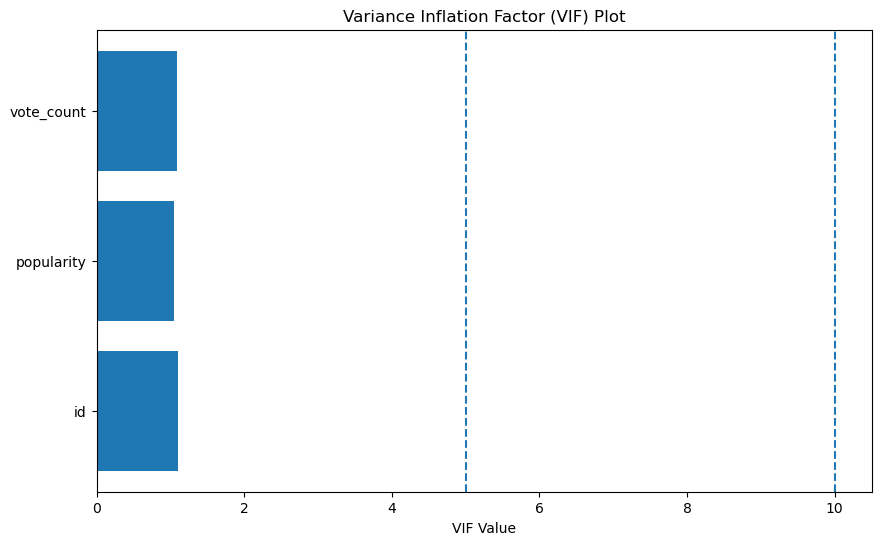

In [765]:
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'])
plt.axvline(x=5, linestyle='--')   # warning level
plt.axvline(x=10, linestyle='--')  # critical level
plt.xlabel('VIF Value')
plt.title('Variance Inflation Factor (VIF) Plot')
plt.show()


All numerical features are independent of each other, there is no multicollinearity, and their relationship with the target is non-linear

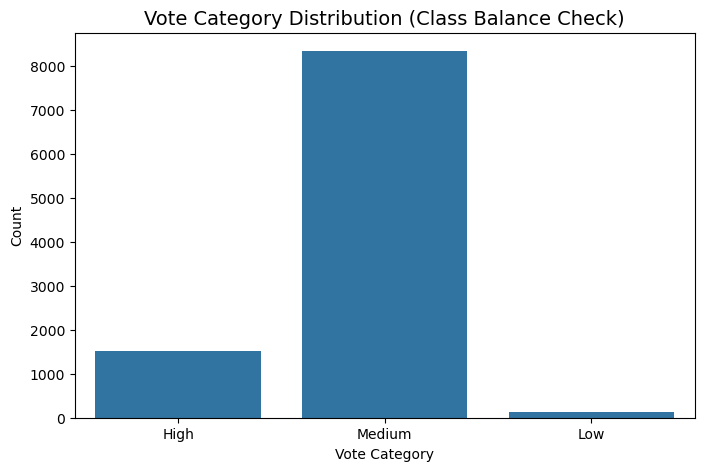

In [766]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='vote_category', data=df)
plt.title('Vote Category Distribution (Class Balance Check)', fontsize=14)
plt.xlabel('Vote Category')
plt.ylabel('Count')
plt.show()


* here class  is imbalanced ,apply smote otherwise it overfit

In [767]:
df['vote_category'].value_counts()


vote_category
Medium    8337
High      1522
Low        141
Name: count, dtype: int64

# cleaning overview text data

In [825]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [826]:
stemmer=PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                     # lowercase
    text = re.sub(r'[^\w\s]', '', text)     # remove punctuation & commas
    text = re.sub(r'\d+', '', text)         # remove numbers
    text = text.split()                     # tokenize
    text = [word for word in text if word not in stop_words]  # remove stopwords
    text=[stemmer.stem(word) for word in text]
    return " ".join(text)


In [770]:
df['overview'] = df['overview'].fillna('')  # fill missing text
df['overview_cleaned'] = df['overview'].apply(clean_text)


In [771]:
# df[['overview', 'overview_cleaned']].head()


In [772]:
# df.drop(["overview"],axis=1,inplace=True)

In [773]:
cat=df.select_dtypes(include=["object"]).columns.tolist()
print(cat)

['title', 'original_language', 'overview', 'vote_category', 'overview_cleaned']


# ordinal

In [774]:
def categorize_rating(rating):
    if rating >= 7.5:
        return "High"
    elif rating >= 5.0:
        return "Medium"
    else:
        return "Low"

df["vote_category"] = df["vote_average"].apply(categorize_rating)


In [775]:
df["vote_category"]=df["vote_category"].map({"High":0,"Low":1,"Medium":2})

In [776]:
language_mean = df.groupby('original_language')['vote_average'].mean()

df['original_language_'] = df['original_language'].map(language_mean)


In [777]:
df.drop(columns=['original_language'], inplace=True)


In [778]:
df.tail()

,id,title,overview,popularity,vote_average,vote_count,Action,Adventure,Animation,Comedy,...,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_year,vote_category,overview_cleaned,original_language_
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...",98.322,4.7,3347,1,1,0,0,...,0,0,0,0,0,0,2010,1,stori follow adventur aang young successor lon...,6.544469
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,12.490,4.7,417,1,1,0,1,...,0,1,1,0,0,0,2015,1,shark take bite east coast sharknado hit washi...,6.544469
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...",18.333,4.6,332,1,0,0,0,...,0,1,0,0,1,0,1990,1,world war ii brave patriot american soldier un...,6.544469
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,15.159,4.7,668,1,1,0,0,...,0,0,0,0,0,0,2007,1,man name farmer set rescu kidnap wife aveng de...,6.544469
9999,455957,Domino,Seeking justice for his partner’s murder by an...,16.482,4.6,221,1,0,0,0,...,0,0,0,1,0,0,2019,1,seek justic partner murder isi member copenhag...,6.544469


In [779]:
df.drop("vote_average",axis=1,inplace=True)

In [780]:
df.drop("id",axis=1,inplace=True)

In [781]:
df.columns

Index(['title', 'overview', 'popularity', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'release_year', 'vote_category',
       'overview_cleaned', 'original_language_'],
      dtype='object')

# DATA TRANSFORMATION

# HANDLE SKEW DATA

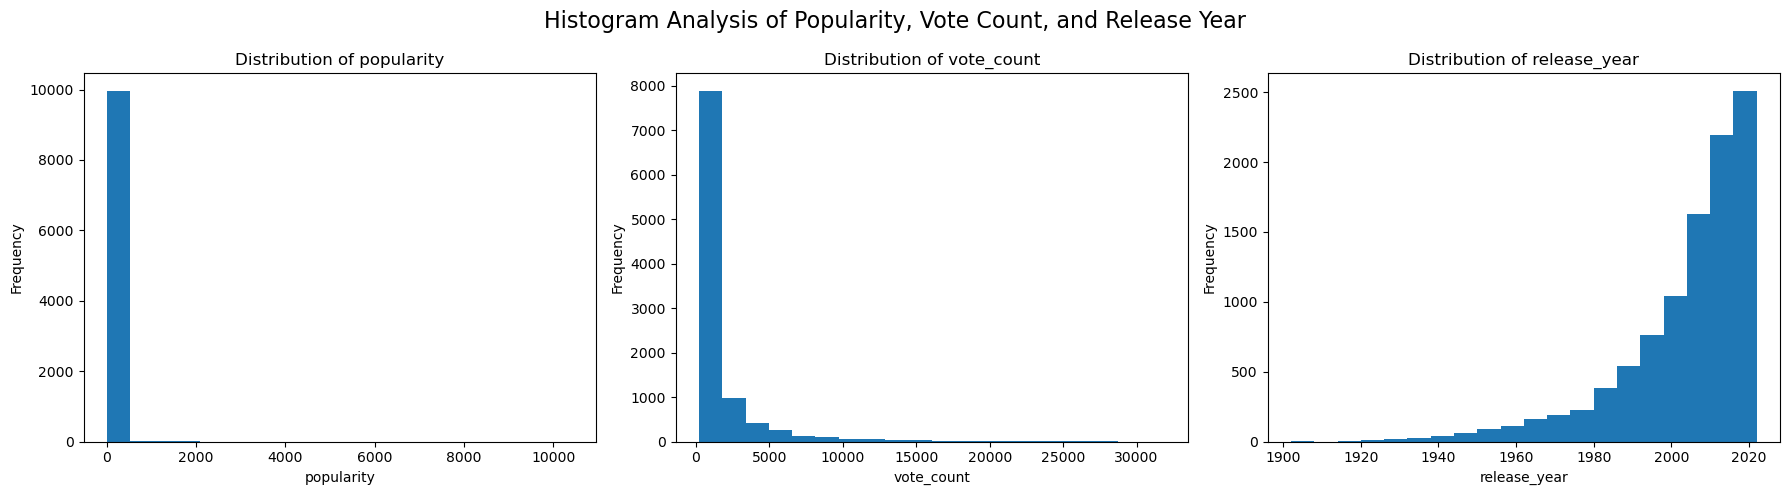

In [782]:
import matplotlib.pyplot as plt

features = ['popularity', 'vote_count', 'release_year']

plt.figure(figsize=(18, 5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histogram Analysis of Popularity, Vote Count, and Release Year', fontsize=16)
plt.tight_layout()
plt.show()


In [783]:
df[['popularity', 'vote_count', 'release_year']].skew()


popularity      35.039206
vote_count       4.185056
release_year    -1.699732
dtype: float64

In [784]:
import numpy as np

df['popularity_log'] = np.log1p(df['popularity'])
df['vote_count_log'] = np.log1p(df['vote_count'])



In [785]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['release_year'] = scaler.fit_transform(df[['release_year']])
df.drop(columns=['release_year'], inplace=True)


In [786]:
# create a copy of the  original data for comparison
df_copy=df.copy()
# log transformation of skewed columns 
df['popularity']=np.log1p(df['popularity'])#log(1+x) to hnadle 


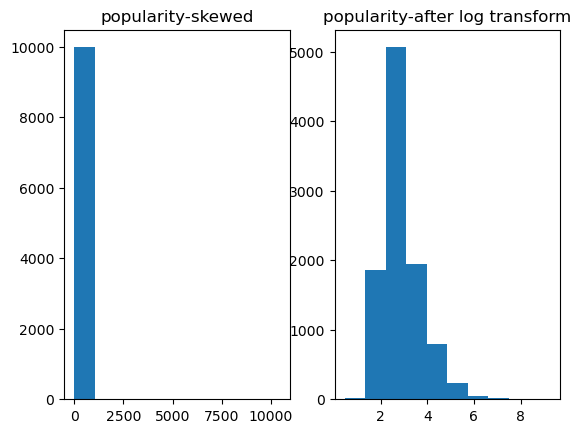

In [787]:
plt.Figure(figsize=(14,7))
# 
ax1=plt.subplot(1,2,1)
cp=plt.hist(df_copy['popularity'])

plt.title("popularity-skewed")
# 
ax2=plt.subplot(1,2,2)
plt.hist(df['popularity'])
plt.title("popularity-after log transform")
plt.show()

In [788]:
df

,title,overview,popularity,vote_count,Action,Adventure,Animation,Comedy,Crime,Drama,...,Science Fiction,TV Movie,Thriller,War,Western,vote_category,overview_cleaned,original_language_,popularity_log,vote_count_log
0,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,4.554666,21862,0,0,0,0,1,1,...,0,0,0,0,0,0,frame doubl murder wife lover upstand banker a...,6.544469,4.554666,9.992551
1,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",3.273667,3731,0,0,0,1,0,1,...,0,0,0,0,0,0,raj rich carefre happygolucki second gener nri...,7.330769,3.273667,8.224700
2,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",4.517268,16280,0,0,0,0,1,1,...,0,0,0,0,0,0,span year chronicl fiction italianamerican cor...,6.544469,4.517268,9.697754
3,Schindler's List,The true story of how businessman Oskar Schind...,3.823432,12959,0,0,0,0,0,1,...,0,0,0,1,0,0,true stori businessman oskar schindler save th...,6.544469,3.823432,9.469623
4,The Godfather: Part II,In the continuing saga of the Corleone crime f...,4.073274,9811,0,0,0,0,1,1,...,0,0,0,0,0,0,continu saga corleon crime famili young vito c...,6.544469,4.073274,9.191361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Last Airbender,"The story follows the adventures of Aang, a yo...",4.598367,3347,1,1,0,0,0,0,...,0,0,0,0,0,1,stori follow adventur aang young successor lon...,6.544469,4.598367,8.116118
9996,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,2.601949,417,1,1,0,1,0,0,...,1,1,0,0,0,1,shark take bite east coast sharknado hit washi...,6.544469,2.601949,6.035481
9997,Captain America,"During World War II, a brave, patriotic Americ...",2.961813,332,1,0,0,0,0,0,...,1,0,0,1,0,1,world war ii brave patriot american soldier un...,6.544469,2.961813,5.808142
9998,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,2.782477,668,1,1,0,0,0,1,...,0,0,0,0,0,1,man name farmer set rescu kidnap wife aveng de...,6.544469,2.782477,6.505784


In [789]:
# Keep title separately
titles = df['title']


In [790]:
df.drop("title",axis=1,inplace=True)

# model building

In [791]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create TF-IDF object
# tfidf = TfidfVectorizer(
#     max_features=3000,
#     min_df=5,
#     ngram_range=(1,2)
# )

# # Fit & transform
# X_overview = tfidf.fit_transform(df['overview_cleaned'])


In [792]:
# type(X_overview)

In [793]:
# import pandas as pd

# tfidf_df = pd.DataFrame(
#     X_overview.toarray(),                # convert sparse → dense
#     columns=tfidf.get_feature_names_out()
# )


In [794]:
# type(tfidf_df)


In [795]:
# df = df.reset_index(drop=True)
# tfidf_df = tfidf_df.reset_index(drop=True)


In [796]:
# df_final = pd.concat([df, tfidf_df], axis=1)


In [797]:
# num_features = df.select_dtypes(include=['int64','float64'])

# df_final = pd.concat([num_features, tfidf_df], axis=1)


In [798]:
# df_final.shape
# df_final.head()


In [799]:
# df_final.shape

In [800]:
# df['overview_clean'] = df['overview'].apply(clean_text)


In [801]:
# df['overview_clean']=X_overview       

In [802]:


# Assuming you already have your processed columns:
# df['features'], df['popularity'], df['vote_count'], df['vote_category'],
# df['original_language_encoded'], df['popularity_log'], df['release_year_scaled'],
# df['overview_freq_encoded']

# Create the new DataFrame
# df_selected = pd.DataFrame({
#                                    # or a list/column of features
#     'popularity': df['popularity'],
#     'vote_count': df['vote_count'],
#     'vote_category': df['vote_category'],
    
#     'popularity_log': df['popularity_log'],
#     'release_year_scaled': df['release_year_scaled'],
#     'overview_freq_encoded': df['overview_freq_encoded']
# })

# # Display the first few rows
# print(df_selected.head())


In [803]:
df.columns

Index(['overview', 'popularity', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'vote_category', 'overview_cleaned',
       'original_language_', 'popularity_log', 'vote_count_log'],
      dtype='object')

In [804]:

# import pandas as pd

# # Define feature columns (all genres)
# features_cols = [
#     'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
#     'Fantasy','History','Horror','Music','Mystery','Romance',
#     'Science Fiction','TV Movie','Thriller','War','Western'
# ]

# Other columns to include
# other_cols = [
#     'popularity',
#     'vote_count',
#     'vote_category',
#     'original_language_',
#     'popularity_log',
    
    
# ]

# # Combine them
# df_selected = df[features_cols + other_cols]

# # Preview
# print(df_selected.head())


In [805]:
# df_selected.head()

In [806]:
# import numpy as np
# import pandas as pd

# # Define feature columns (genres)
# features_cols = [
#     'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
#     'Fantasy','History','Horror','Music','Mystery','Romance',
#     'Science Fiction','TV Movie','Thriller','War','Western'
# ]

# # Other columns to include
# other_cols = [
#     'popularity',
#     'vote_count',
#     'vote_category',
#     'original_language_',
#     'popularity_log',
#     'release_year_scaled',
#     'overview_freq_encoded'
# ]

# # Convert to numpy arrays
# features_array = df[features_cols].to_numpy()
# other_array = df[other_cols].to_numpy()

# # Horizontally stack them
# stacked_array = np.hstack([features_array, other_array])

# # Convert back to DataFrame
# df_selected = pd.DataFrame(
#     stacked_array, 
#     columns=features_cols + other_cols
# )

# # Preview
# print(df_selected.head())


In [807]:
# fd_selected

In [808]:
# from scipy.sparse import hstack
# from sklearn.feature_extraction.text import TfidfVectorizer


In [809]:
# tfidf = TfidfVectorizer(
#     max_features=300,
#     stop_words='english'
# )

# tfidf_matrix = tfidf.fit_transform(df['overview_cleaned'])


In [810]:
# df_features = df[
#     [
#         'popularity',
#         'vote_count',
#         'vote_category',
#         'original_language_encoded',
#         'popularity_log',
#         'release_year_scaled',
#         'overview_freq_encoded',
#         'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
#         'Fantasy','History','Horror','Music','Mystery','Romance',
#         'Science Fiction','TV Movie','Thriller','War','Western'
#     ]



In [811]:
# X_numeric = df_features.values


In [812]:
# X = hstack([X_numeric, tfidf_matrix])


In [813]:
# print(X.shape)


In [814]:
# x = df_final.drop(columns=['vote_category'])
# y = df_final['vote_category']

# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=42, stratify=y
# )


In [815]:
# print(X.shape)


In [816]:
# type(x_train)


In [817]:
# model=DecisionTreeClassifier()
# model.fit(x_train,y_train)

In [818]:
# y_pred=model.predict(x_test)

In [819]:
# acc=accuracy_score(y_test,y_pred)
# acc
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [820]:
df.columns

Index(['overview', 'popularity', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'vote_category', 'overview_cleaned',
       'original_language_', 'popularity_log', 'vote_count_log'],
      dtype='object')

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


In [ ]:
stemmer=PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                     # lowercase
    text = re.sub(r'[^\w\s]', '', text)     # remove punctuation & commas
    text = re.sub(r'\d+', '', text)         # remove numbers
    text = text.split()                     # tokenize
    text = [word for word in text if word not in stop_words]  # remove stopwords
    text=[stemmer.stem(word) for word in text]
    return " ".join(text)


In [ ]:
df['overview'] = df['overview'].fillna('')  # fill missing text
df['overview_cleaned'] = df['overview'].apply(clean_text)


In [833]:
tfidf = TfidfVectorizer(
    max_features=300,
    ngram_range=(1,2)
)

X_text = tfidf.fit_transform(df["overview_clean"])


In [834]:
num_features = ["popularity", "vote_count"]

df[num_features] = df[num_features].fillna(0)

scaler = StandardScaler()
X_num = scaler.fit_transform(df[num_features])


In [835]:
X = hstack([X_text, X_num])
y = df["vote_category"]


In [836]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [853]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [854]:
from sklearn.linear_model import LogisticRegression

model = DecisionTreeClassifier(max_depth=4,min_samples_leaf=100,min_samples_split=200)
model.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, min_samples_split=200)

In [855]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4525
              precision    recall  f1-score   support

           0       0.31      0.15      0.20       305
           1       0.02      0.68      0.04        28
           2       0.85      0.50      0.63      1667

    accuracy                           0.45      2000
   macro avg       0.39      0.44      0.29      2000
weighted avg       0.76      0.45      0.56      2000



In [856]:
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [857]:
class_models={'Ir':LogisticRegression(max_iter=500),'rfc':RandomForestClassifier(min_samples_leaf=20,min_samples_split=30,n_estimators=200),'dtc':DecisionTreeClassifier(min_samples_leaf=20,min_samples_split=30,max_depth=4),'knn':KNeighborsClassifier(n_neighbors=11),'svm':SVC(kernel='linear'),'gbc':GradientBoostingClassifier(random_state=0,learning_rate=0.45)}

In [858]:
results = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

for model_name, model in class_models.items():
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred, average='weighted')
    recall = recall_score(y_test, model_pred, average='weighted')
    f1 = f1_score(y_test, model_pred, average='weighted')

    results['model'].append(model_name)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1_score'].append(f1)

    #convert results to a dataframe
results_df=pd.DataFrame(results)

    #sort by accuracy
results_df=results_df.sort_values(by="accuracy",ascending=False)

    #display the sorted dataframe  with background  ngradient
results_df.style.background_gradient("Reds") 


c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\m

,model,accuracy,precision,recall,f1_score
3,knn,0.840000,0.801526,0.840000,0.785815
0,Ir,0.836500,0.791060,0.836500,0.775715
2,dtc,0.836000,0.787152,0.836000,0.778378
1,rfc,0.833500,0.694722,0.833500,0.757810
4,svm,0.833500,0.694722,0.833500,0.757810
5,gbc,0.801000,0.750281,0.801000,0.768294


# pickle file 

In [859]:
import pickle
#save the classification model
c_model=KNeighborsClassifier(n_neighbors=11

)
c_model.fit(X_train,y_train.values.ravel())  
with open("classification_model.pkl",'wb')as file:
    pickle.dump(c_model,file)  

# DIPLOYMENT

In [860]:
import gradio as gr
import numpy as np
import pickle

# Load model
with open("classification_model.pkl", "rb") as f:
    model = pickle.load(f)

# Prediction function
def predict_vote_category(
    genres,
    popularity,
    vote_count,
    language,
    release_year,
    overview_score
):
    # Genre encoding (same order as training)
    genre_list = [
        'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
        'Fantasy','History','Horror','Music','Mystery','Romance',
        'Science Fiction','TV Movie','Thriller','War','Western'
    ]

    genre_vector = [1 if g in genres else 0 for g in genre_list]

    # Derived features (must match training logic)
    popularity_log = np.log1p(popularity)
    release_year_scaled = (release_year - 1900) / (2025 - 1900)

    X = np.array([genre_vector + [
        popularity,
        vote_count,
        language,
        popularity_log,
        release_year_scaled,
        overview_score
    ]])

    pred = model.predict(X)[0]
    return f"⭐ Predicted Movie Rating Category: {pred}"


In [861]:
interface = gr.Interface(
    fn=predict_vote_category,

    inputs=[
        gr.CheckboxGroup(
            choices=[
                'Action','Adventure','Animation','Comedy','Crime','Drama',
                'Family','Fantasy','History','Horror','Music','Mystery',
                'Romance','Science Fiction','TV Movie','Thriller',
                'War','Western'
            ],
            label="🎬 Select Movie Genres"
        ),

        gr.Slider(
            minimum=0, maximum=100, step=1,
            label="🔥 Popularity Score",
            info="How popular is the movie?"
        ),

        gr.Slider(
            minimum=0, maximum=500000, step=1000,
            label="🗳️ Number of Votes",
            info="Total votes received by the movie"
        ),

        gr.Dropdown(
            choices=[0, 1, 2, 3, 4],
            label="🌍 Movie Language",
            info="0: English, 1: French, 2: Hindi, etc."
        ),

        gr.Slider(
            minimum=1920, maximum=2025, step=1,
            label="📅 Release Year"
        ),

        gr.Slider(
            minimum=0, maximum=1, step=0.01,
            label="📝 Story Quality Score",
            info="Derived from movie description"
        )
    ],

    outputs=gr.Textbox(label="Prediction"),

    title="🎥 Movie Rating Category Predictor",
    description=(
        "Enter simple movie details to predict how the movie will be rated "
        "based on audience voting patterns."
    ),

    theme="soft"
)

interface.launch()


c:\Users\Pc\anaconda3\Lib\site-packages\gradio\interface.py:171: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  super().__init__(


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\Pc\anaconda3\Lib\site-packages\gradio\queueing.py", line 766, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\gradio\route_utils.py", line 355, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\gradio\blocks.py", line 2147, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\gradio\blocks.py", line 1629, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

In [862]:
import gradio as gr
import numpy as np
import pickle

# --------------------------------------------------
# Load trained model
# --------------------------------------------------
with open("classification_model.pkl", "rb") as f:
    model = pickle.load(f)

# --------------------------------------------------
# Class label mapping (IMPORTANT)
# --------------------------------------------------
vote_category_map = {
    0: "High Rating:Recommended ⭐",
    1: "Medium ⭐",
    2: "low "
}

# --------------------------------------------------
# Prediction function
# --------------------------------------------------
def predict_vote_category(
    genres,
    popularity,
    vote_count,
    language,
    release_year,
    overview_score
):
    genre_list = [
        'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
        'Fantasy','History','Horror','Music','Mystery','Romance',
        'Science Fiction','TV Movie','Thriller','War','Western'
    ]

    # Encode genres
    genre_vector = [1 if g in genres else 0 for g in genre_list]

    # Derived features (same logic as training)
    popularity_log = np.log1p(popularity)
    release_year_scaled = (release_year - 1900) / (2025 - 1900)

    # Final input array
    X = np.array([genre_vector + [
        popularity,
        vote_count,
        language,
        popularity_log,
        release_year_scaled,
        overview_score
    ]])

    # Prediction
    pred = int(model.predict(X)[0])
    return f"⭐ Predicted Movie Rating Category: {vote_category_map[pred]}"

# --------------------------------------------------
# Gradio Interface (User-Friendly)
# --------------------------------------------------
interface = gr.Interface(
    fn=predict_vote_category,

    inputs=[
        gr.CheckboxGroup(
            choices=[
                'Action','Adventure','Animation','Comedy','Crime','Drama',
                'Family','Fantasy','History','Horror','Music','Mystery',
                'Romance','Science Fiction','TV Movie','Thriller',
                'War','Western'
            ],
            label="🎬 Select Movie Genres"
        ),

        gr.Slider(
            minimum=0, maximum=100, step=1,
            label="🔥 Popularity Score",
            info="How popular is the movie?"
        ),

        gr.Slider(
            minimum=0, maximum=500000, step=1000,
            label="🗳️ Number of Votes",
            info="Total audience votes"
        ),

        gr.Dropdown(
            choices=[0, 1, 2, 3, 4],
            label="🌍 Movie Language",
            info="0: English, 1: French, 2: Hindi, etc."
        ),

        gr.Slider(
            minimum=1920, maximum=2025, step=1,
            label="📅 Release Year"
        ),

        gr.Slider(
            minimum=0, maximum=1, step=0.01,
            label="📝 Story Quality Score",
            info="Derived from movie description"
        )
    ],

    outputs=gr.Textbox(label="Prediction"),

    title="🎥 Movie Rating Category Predictor",
    description=(
        "Enter simple movie details to predict whether a movie will receive "
        "Low, Medium, or High audience ratings."
    ),

    theme="soft"
)

# --------------------------------------------------
# Launch app
# --------------------------------------------------
interface.launch()


c:\Users\Pc\anaconda3\Lib\site-packages\gradio\interface.py:171: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  super().__init__(


* Running on local URL:  http://127.0.0.1:7865
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\Pc\anaconda3\Lib\site-packages\gradio\queueing.py", line 766, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\gradio\route_utils.py", line 355, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\gradio\blocks.py", line 2147, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\gradio\blocks.py", line 1629, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Pc\anaconda3\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^